# ECSI MULTIGROUP ANALYSIS



## INTRODUCTION

## METHODOLOGY

Covariance-based SEM ( CB-SEM)
is primarily used to confirm (or reject) theories (i.e., a set of systematic
relationships between multiple variables that can be tested empirically).
It does this by determining how well a proposed theoretical
model can estimate the covariance matrix for a sample data set. In
contrast, PLS-SEM (also called PLS path modeling) is primarily used
to develop theories in exploratory research. It does this by focusing
on explaining the variance in the dependent variables when examining
the model.

## ECSI MODEL EQUATIONS

The general form of the structural model of ECSI is:

$$\eta =\beta\eta + \gamma \xi + \nu $$

$$E( \nu | \xi) = 0$$

where $\eta = (\eta_1, \eta_2, \dots, \eta_6)$ is the vector of endogenous latent variables:

- $\eta_1$ : customer expectations; 
- $\eta_2$ : perceived quality of products and services;
- $\eta_3$ : perceived value;
- $\eta_4$ : customer satisfaction (ECSI);
- $\eta_5$ : complaints;
- $\eta_6$ : customer loyalty.


$\xi$ is the exogenous latent variable (image), $\beta$ is the matrix of coeficients of $\eta$, $\gamma$ is the vector of coeficients of $\xi$, and $\nu$ is the vector of errors. 


$\begin{bmatrix}\eta_1\\ \eta_2\\ \eta_3\\ \eta_4\\ \eta_5\\ \eta_6\\ \end{bmatrix} =
\begin{bmatrix} 0&0&0&0&0&0\\ \beta_{21}&0&0&0&0&0 \\ \beta_{31}&\beta_{32}&0&0&0&0 \\ \beta_{41}&\beta_{42}&\beta_{43}&0&0&0 \\ 0&0&0&\beta_{54}&0&0 \\ 0&0&0&\beta_{64}&\beta_{65}&0 \\ \end{bmatrix} 
\begin{bmatrix}\eta_1\\ \eta_2\\ \eta_3\\ \eta_4\\ \eta_5\\ \eta_6\\ \end{bmatrix} +
\begin{bmatrix} \gamma_1\\ 0 \\ 0 \\ \gamma_4\\ 0 \\ \gamma_6\\ \end{bmatrix} \xi + 
\begin{bmatrix} \nu_1\\ \nu_2 \\ \nu_3 \\ \nu_4 \\ \nu_5 \\ \nu_6 \\ \end{bmatrix}$ 

#### Conceptual Model

## ECSI INNER MODEL

![ECSI Inner Model](images/ECSI_graph_3.png "ECSI Inner Model")

## ECSI OUTER MODEL

### DATA DISTRIBUTION

The responses are requested using a 10-point scale, then the distribution of the answers in each of the possible response categories (1, 2, 3, ... , 10) can be calculated and displayed in a table or chart.

<pre>
-----------------
| Questão | Descrição | Valores
|:---:|:----|:----|
| Q2 | Ano a partir do qual o inquirido é cliente do banco | 9999 – NS/NR |
| Q3 | Grau de satisfação global com o banco | 1_10 <br>99: NS/NR | 
| Q4A | Banco de confiança no que diz e no que faz | 1_10 <br>99: NS/NR | 
| Q4B | Banco perfeitamente implantado no mercado | 1_10 <br>99: NS/NR | 
| Q4C | Contribui positivamente para a sociedade | 1_10 <br>99: NS/NR | 
| Q4D | Preocupa-se com os seus clientes | 1_10 <br>99: NS/NR | 
| Q4E | Banco inovador e virado para o futuro | 1_10 <br>99: NS/NR | 
| Q5A | Expectativas que tinha há seis meses atrás ou quando se tornou cliente do banco relativamente à qualidade global do mesmo | 1_10 <br>99: NS/NR |  
| Q5B | Expectativas que tinha há seis meses atrás ou quando se tornou cliente do banco relativamente à capacidade do mesmo oferecer produtos e serviços que satisfizessem as suas necessidades pessoais |1_10 <br>99: NS/NR |  
| Q5C | Expectativas que tinha há seis meses atrás ou quando se tornou cliente do banco relativamente à capacidade do mesmo evitar falhas ou erros |  1_10 <br>99: NS/NR | 
| Q6 | Qualidade apercebida do banco | 1_10 <br>99: NS/NR | 
| Q7A | Qualidade dos produtos e serviços bancários oferecidos | 1_10 <br>99: NS/NR | 
| Q7B | Atendimento e capacidade de aconselhamento | 1_10 <br>99: NS/NR | 
| Q7C | Acessibilidade a produtos e serviços por via das novas tecnologias | 1_10 <br>99: NS/NR | 
| Q7D | Fiabilidade dos produtos e serviços oferecidos | 1_10 <br>99: NS/NR |  
| Q7E | Diversidade de produtos e serviços | 1_10 <br>99: NS/NR | 
| Q7F | Clareza e transparência na informação fornecida |1_10 <br>99: NS/NR | 
| Q7G | Disponibilidade das agências |1_10 <br>99: NS/NR |  
| Q7H | Qualidade das agências | 1_10 <br>99: NS/NR | 
| Q9 | Realização das expectativas percepcionadas | 1_10 <br>99: NS/NR | 
| Q10 | Classificação dos preços e das taxas dos produtos e serviços do banco, dada a qualidade dos mesmos | 1_10 <br>99: NS/NR | 
| Q11 | Classificação da qualidade dos produtos e serviços do banco, dados os preços e as taxas dos mesmos  | 1_10 <br>99: NS/NR | 
| Q12 | Probabilidade de voltar a escolher o banco no caso de adquirir um produto ou serviço bancário | 1_10 <br>99: NS/NR | 
| Q13 | Diferença a partir da qual mudaria de banco face à redução de comissões, juros e outras taxas em outros bancos | 0_100(%) <br>222: FicaSempreBanco <br>999: NS/NR | 
| Q14 | Apresentação de reclamações  | 1: Sim <br>2: Não | 
| Q15  | (Caso Q14=1) Avaliação da forma como foi tratada a reclamação apresentada  | 1_10 <br>99: NS/NR | 
| Q16  | (Caso Q14=2) Expectativa na forma de resolução de uma possível reclamação | 1_10 <br>99: NS/NR | 
| Q17  | Probabilidade de recomendar o banco a outras pessoas | 1_10 <br>99: NS/NR | 
| Q18  | Medida de proximidade do banco do cliente a um banco que considere ideal | 1_10 9<br>9: NS/NR | 
</pre>
Nota: Nas respostas com escala de 1 a 10, os valores de 1 a 5 correspondem a avaliações negativas e os valores de 6 a 10 correspondem a avaliações
positivas.

<pre>
----------------
|Questão | Descrição | Valores |
|:---:|:----|:----|
| B1 | Género do inquirido | 1-Feminino <br> 2-Masculino | 
| B2 | Ano de nascimento do inquirido | (últimos dois dígitos) <br>99:Revelação recusada | 
| B5 | Situação profissional | 1 – Empregado <br>2 – Desempregado <br>3 – Estudante <br>4 – Doméstico <br>5 – Reformado <br>6 – Outra <br>9 – NS/NR | 
| B6 | (Caso B5=1 ou B5=6) Situação perante a actividade profissional | 1 – Patrão <br>2 – Trabalhador por conta própria <br>3 – Trabalhador por conta de outrem <br>4 – Outra <br>9 – NS/NR | 
| B8 | Nível de instrução escolar | 1 – Não sabe ler nem escrever <br>2 – Sabe ler e escrever sem possuir grau de ensino <br>3 – Ensino básico elementar <br>4 – Ensino básico preparatório <br>5 – Ensino secundário unificado <br>6 – Ensino secundário complementar <br>7 – Cursos médios <br>8 – Ensino superior incompleto <br>9 – Ensino superior completo ou mais <br>99 – NS/NR|
------------------
</pre>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

import pandas as pd
import numpy as np

In [2]:
mqm = pd.read_csv('../BD_MQM.csv', index_col = "Respondent", 
                  encoding="utf8", skipinitialspace=True, na_values=['9999','99'])
mqm.describe()

,Bank,Q2,Q3,Q4A,Q4B,Q4C,Q4D,Q4E,Q5A,Q5B,...,Q15,Q16,Q1516,Q17,Q18,B1,B2,B5,B6,B8
count,1758.000000,1406.000000,1756.000000,1748.000000,1707.000000,1601.000000,1733.000000,1688.000000,1692.000000,1634.000000,...,180.000000,1423.000000,1603.000000,1715.000000,1678.000000,1758.000000,1744.000000,1758.000000,1078.000000,1749.000000
mean,4.008532,1992.160028,5.485592,5.674485,5.946514,5.383573,5.471956,5.585900,5.216489,5.231151,...,4.087222,5.208433,5.082533,5.393469,5.076043,1.432309,62.068807,2.129124,2.833024,5.937107
std,2.001546,10.122136,1.182721,1.206779,1.056573,1.293575,1.376258,1.212952,1.162175,1.210245,...,2.167563,1.381508,1.531168,1.590136,1.356311,0.610776,15.669890,1.594257,0.624436,2.172625
min,1.000000,1950.000000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,...,0.700000,0.700000,0.700000,0.700000,0.700000,1.000000,18.000000,1.000000,1.000000,2.000000
25%,2.000000,1987.000000,4.900000,4.900000,5.600000,4.900000,4.900000,4.900000,4.200000,4.200000,...,2.800000,4.200000,4.200000,4.900000,4.200000,1.000000,51.000000,1.000000,3.000000,4.000000
50%,4.000000,1995.000000,5.600000,5.600000,6.300000,5.600000,5.600000,5.600000,5.600000,5.600000,...,4.200000,5.600000,5.600000,5.600000,4.900000,1.000000,64.000000,1.000000,3.000000,6.000000
75%,6.000000,2000.000000,6.300000,7.000000,7.000000,6.300000,7.000000,6.300000,5.600000,6.300000,...,5.775000,6.300000,6.300000,7.000000,5.600000,2.000000,75.000000,3.000000,3.000000,8.000000
max,7.000000,2005.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,9.000000,88.000000,9.000000,9.000000,9.000000


In [3]:
image = ['Q4A', 'Q4B', 'Q4C', 'Q4D', 'Q4E']
expectations = ['Q5A', 'Q5B','Q5C']
perceivedQuality = ['Q6', 'Q7A', 'Q7B', 'Q7C', 'Q7D', 'Q7E', 'Q7F', 'Q7G', 'Q7H']
perceivedValue = ['Q10', 'Q11']
satisfaction = ['Q3', 'Q9', 'Q18']
complaints = ['Q1516']
loyalty = ['Q12', 'Q17']
socio = ['Bank', 'B1', 'B5', 'B6', 'B8']

## LOGISTIC REGRESSION

In [4]:
labels = pd.get_dummies(mqm[socio], columns=['Bank', 'B1', 'B5', 'B6', 'B8'])
features = mqm[['Q2', 'Q3', 'Q4A', 'Q4B', 'Q4C', 'Q4D', 'Q4E', 'Q5A', 'Q5B', 'Q5C', 'Q6', 'Q7A', 'Q7B', 
                'Q7C', 'Q7D', 'Q7E', 'Q7F', 'Q7G', 'Q7H', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 
                'Q1516', 'Q17', 'Q18', 'B2']]

In [5]:
labels.columns = ['Bank_1', 'Bank_2', 'Bank_3', 'Bank_4', 'Bank_5', 'Bank_6', 'Bank_7',
                  'B1_1Feminino', 'B1_2Masculino ', 'B1_9NR',
                  'B5_1Empregado', 'B5_2Desempregado', 'B5_3Estudante', 
                  'B5_4Domestico', 'B5_5Reformado', 'B5_6Outra', 'B5_9NS/NR', 
                  'B6_1Patrão', 'B6_2TrabalhadorContaPropria', 'B6_3TrabalhadorContaOutrem', 
                  'B6_4Outra', 'B6_9NS_NR ', 
                  'B8_2SabeLerEscrever', 'B8_3EnsinoBasicoElementar', 'B8_4EnsinoBasicoPreparatorio', 
                  'B8_5EnsinoSecundarioUnificado', 'B8_6EnsinoSecundarioComplementar', 
                  'B8_7CursoMedio', 'B8_8EnsinoSuperiorIncompleto', 'B8_9EnsinoSuperiorCompleto']

In [6]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logitScores = {}
logitCoefs = pd.DataFrame(index=features.columns, columns = labels.columns)

for label in labels:
    train_data, test_data, train_labels, test_labels = train_test_split(features, labels[[label]], 
                                                                       random_state=123)
    imp = Imputer()
    imp.fit(train_data)
    train_data = imp.transform(train_data)
    test_data = imp.transform(test_data)
    modelLogit = LogisticRegression()
    modelLogit = LogisticRegression().fit(train_data, train_labels.values.ravel())
    score = modelLogit.score(test_data, test_labels.values.ravel())
    #print('#', list(labels[[label]]), "Logit Score: %f" % score)
    #print(confusion_matrix(test_labels, modelLogit.predict(test_data)))
    logitScores[label] = score 
    logitCoefs[label] = modelLogit.coef_.T
    #print(" ")

logitScores = pd.DataFrame.from_dict([logitScores]).reindex(columns=logitCoefs.columns)

In [7]:
logitCoefs.T

,Q2,Q3,Q4A,Q4B,Q4C,Q4D,Q4E,Q5A,Q5B,Q5C,...,Q9,Q10,Q11,Q12,Q13,Q14,Q1516,Q17,Q18,B2
Bank_1,-0.001102,-0.017875,-0.222671,-0.069140,-0.016187,-0.099479,-0.063048,0.016229,-0.104250,0.100302,...,0.016640,-0.176933,0.075221,-0.181082,-0.021295,0.321298,0.153067,-0.074073,0.051435,0.001035
Bank_2,-0.001801,0.224855,-0.023717,-0.063790,-0.172706,0.133170,-0.038070,-0.085301,-0.022233,0.079299,...,0.022235,0.098100,0.042262,0.050182,-0.047562,0.060129,-0.106706,-0.030614,0.117203,-0.003767
Bank_3,-0.001432,-0.035431,0.015919,0.444623,0.214827,-0.296699,-0.110711,-0.216095,-0.074733,-0.022974,...,-0.130264,0.048642,0.038318,0.084783,0.067307,0.542323,0.025930,0.152570,0.097499,0.006965
Bank_4,-0.001338,-0.032332,-0.214525,0.063060,-0.203231,-0.103116,0.572827,0.078906,0.038523,-0.047289,...,0.063087,-0.037311,-0.186225,0.093661,-0.023639,-0.133712,0.019130,-0.048383,-0.045821,0.001147
Bank_5,-0.001804,0.034612,0.140329,-0.229826,0.224176,0.018892,-0.158559,0.024683,0.096602,-0.015832,...,-0.110024,0.113693,0.019316,-0.033777,0.049070,-0.007317,-0.006212,0.225935,-0.137866,0.006909
Bank_6,-0.000013,-0.073770,0.136924,0.139141,-0.113881,0.198120,-0.075850,-0.016974,0.067775,0.069984,...,0.123444,-0.103511,0.147855,-0.049484,-0.004329,-0.249883,-0.100129,-0.176178,0.030632,-0.013844
Bank_7,-0.000505,-0.076668,0.167175,-0.364532,0.080494,0.229224,-0.160258,0.216717,0.038052,-0.173992,...,0.004849,0.125824,-0.113572,0.008278,-0.026926,-0.329229,0.046188,0.070237,-0.111294,0.007545
B1_1Feminino,-0.000936,0.135725,-0.045637,0.094455,0.089889,0.049648,-0.023345,-0.123345,0.033994,0.040711,...,0.032474,-0.185560,0.153966,-0.062812,0.069869,-0.130833,0.063810,-0.037434,0.027289,0.007905
B1_2Masculino,0.000901,-0.119638,0.044308,-0.094848,-0.083543,-0.054975,0.020764,0.121392,-0.039054,-0.032916,...,-0.038148,0.187909,-0.159018,0.057074,-0.069363,0.153037,-0.062376,0.037497,-0.030033,-0.007849
B1_9NR,-0.002756,-0.801950,-0.097484,-0.015902,-0.317483,0.301561,0.132797,0.003185,0.194991,-0.371346,...,0.285968,-0.103107,0.292844,0.460791,-0.048068,-0.324485,-0.179656,0.048986,0.104255,-0.005693


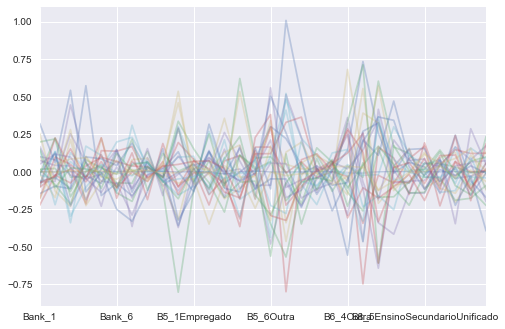

In [16]:
logitCoefs.T.plot(legend=False, alpha=0.3)

In [9]:
logitScores.T

,0
Bank_1,0.847727
Bank_2,0.881818
Bank_3,0.863636
Bank_4,0.854545
Bank_5,0.852273
Bank_6,0.850000
Bank_7,0.825000
B1_1Feminino,0.563636
B1_2Masculino,0.570455
B1_9NR,1.000000


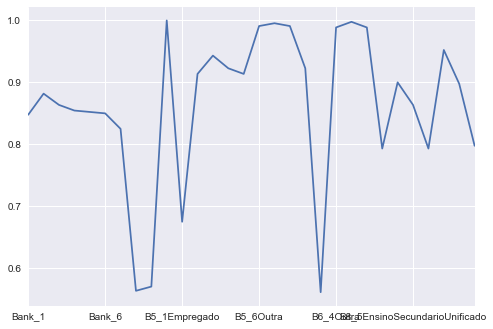

In [19]:
logitScores.T.plot(legend=False)